# Run clouds over hits and store the output dataframe



### April 2021, JAH

In [1]:
#%matplotlib inline
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

#to_df = pd.DataFrame.from_records

In [159]:
import hipy.utils        as ut
import hipy.pltext       as pltext
#import hipy.histos       as histos

import clouds        as clouds
import pltclouds     as pltclouds

#import next.reco.chits    as chits
import next.reco.display  as nplay
import next.core.io       as nio

import next.reco.cloudsdia as cloudsdia
#import next.core.city     as ncity


In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed Apr 21 15:17:59 2021


### load data

In [5]:
def get_clouds_filename(run_number):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/clouds_ds_{run_number}.h5'
    return filename

def get_clouds_df(fname):
    return pd.read_hdf(fname, 'clouds')    


In [6]:
run_number = 8182
fname      = get_clouds_filename(run_number)
dfclouds   = get_clouds_df(fname)
nevents    = len(dfclouds.groupby('event'))
print(fname)
print('len ', len(dfclouds), 'number of events ', nevents)

/home/hernando/data/NEW/clouds_ds_8182.h5
len  1899479 number of events  2760


In [403]:
ievts = [i for i, evt in dfclouds.groupby('event')]

In [406]:
ii  = 2000
evt = dfclouds[dfclouds['event'] == ievts[ii]]
res = cloudsdia.ana_blobs(evt)
res

,iblob,idblob,blob_e,blob_size,iblob_dist,blob_x,blob_y,blob_z,blob_ecell,nblob_brans,nblob_lbran,iblob_i0,iblob_i1,nblobs,evt_ene,nevt_size,trk_id,trk_ene,trk_dz
0,0,379,0.701759,241.0,2,-95.0,-65.0,396.535801,0.031981,3,13,0,0,3,1.659638,850,379,1.649529,88.0
1,1,388,0.140973,79.0,2,-95.0,-55.0,324.535801,0.007975,3,13,11,11,3,1.659638,850,379,1.649529,88.0
2,2,420,0.068652,49.0,1,-95.0,-45.0,316.535801,0.003237,2,14,12,12,3,1.659638,850,379,1.649529,88.0


{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': True, 'crests': True, 'crest': False}


<IPython.core.display.Javascript object>


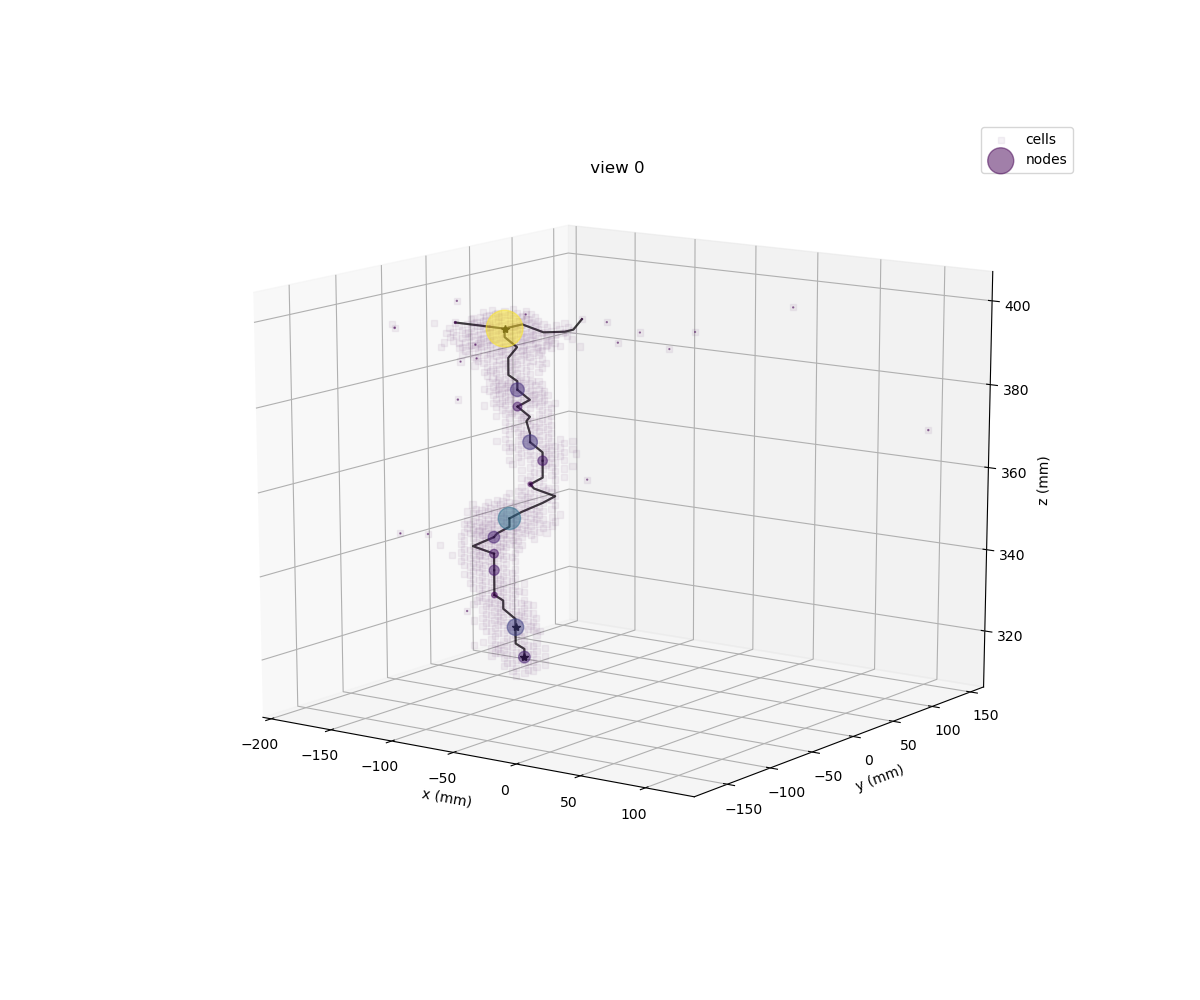

In [408]:
draw, plots = pltclouds.get_draw_clouds(evt)
plots['crest']  = False
plots['tracks'] = True
print(plots)
draw(plots)
plt.plot(res.blob_x, res.blob_y, res.blob_z, marker = '*', ls = '');